In [13]:
# importing libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

# Load data

In [14]:
df = pd.read_csv('../input/hdb-flat-prices-19902021-march/ALL Prices 1990-2021 mar.csv')

In [15]:
df.head()

month  year        town  town_dummy flat_type block       street_name  \
0  1990-01  1990  ANG MO KIO           2    4 ROOM   308  ANG MO KIO AVE 1   
1  1990-01  1990  ANG MO KIO           2    3 ROOM   308  ANG MO KIO AVE 1   
2  1990-01  1990  ANG MO KIO           2    3 ROOM   216  ANG MO KIO AVE 1   
3  1990-01  1990  ANG MO KIO           2    3 ROOM   308  ANG MO KIO AVE 1   
4  1990-01  1990  ANG MO KIO           2    4 ROOM   211  ANG MO KIO AVE 3   

                          address  latitude   longitude  ... price_psm_yearly  \
0  308 ANG MO KIO AVE 1 SINGAPORE  1.365485  103.844025  ...        10.997442   
1  308 ANG MO KIO AVE 1 SINGAPORE  1.365485  103.844025  ...         8.464849   
2  216 ANG MO KIO AVE 1 SINGAPORE  1.366272  103.841465  ...         7.606769   
3  308 ANG MO KIO AVE 1 SINGAPORE  1.365485  103.844025  ...         8.287972   
4  211 ANG MO KIO AVE 3 SINGAPORE  1.369226  103.841652  ...        11.484353   

   Core CPI  price cpi_adj price_psm cpi_adj  bala lease pct  \
0     61.59   139633.05730       1517.750623            92.9   
1     61.59    95794.77188       1168.228925            92.9   
2     61.59    76635.81750       1049.805719            92.9   
3     61.59    76635.81750       1143.818172            92.9   
4     61.59   129891.21610       1603.595261            93.3   

   price lease_adj implied  price_psm lease_adj implied  \
0             88869.752422                   965.975570   
1             60968.783638                   743.521752   
2             48775.026911                   668.151054   
3             48775.026911                   727.985476   
4             82315.112540                  1016.235957   

   price cpi_lease_adj implied  price_psm cpi_lease_adj implied  year_gni  
0                144292.502700                      1568.396769     22901  
1                 98991.368143                      1207.211806     22901  
2                 79193.094510                      1084.836911     22901  
3                 79193.094510                      1181.986486     22901  
4                133650.125891                      1650.001555     22901  

[5 rows x 28 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840918 entries, 0 to 840917
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   month                            840918 non-null  object 
 1   year                             840918 non-null  int64  
 2   town                             840918 non-null  object 
 3   town_dummy                       840918 non-null  int64  
 4   flat_type                        840918 non-null  object 
 5   block                            840918 non-null  object 
 6   street_name                      840918 non-null  object 
 7   address                          840918 non-null  object 
 8   latitude                         840918 non-null  float64
 9   longitude                        840918 non-null  float64
 10  storey_range                     840918 non-null  object 
 11  storey                           840918 non-null  int64  
 12  ar

In [17]:
df.describe()

year     town_dummy       latitude      longitude  \
count  840918.000000  840918.000000  840918.000000  840918.000000   
mean     2004.512196       3.892261       1.361102     103.839049   
std         8.135802       1.403197       0.041576       0.073889   
min      1990.000000       1.000000       1.266682     103.685206   
25%      1998.000000       2.000000       1.333346     103.772844   
50%      2003.000000       4.000000       1.354131     103.842792   
75%      2010.000000       5.000000       1.380824     103.897752   
max      2021.000000       6.000000       1.457052     103.988777   

              storey       area_sqm    lease_start      lease_rem  \
count  840918.000000  840918.000000  840918.000000  840918.000000   
mean        7.567124      95.608704    1987.313952      81.780300   
std         4.657776      26.026266       9.637392       9.959341   
min         2.000000      28.000000    1966.000000      45.000000   
25%         5.000000      73.000000    1980.000000      75.000000   
50%         8.000000      93.000000    1986.000000      83.000000   
75%        11.000000     114.000000    1995.000000      90.000000   
max        50.000000     307.000000    2019.000000     101.000000   

       resale_price      price_psm  price_psm_yearly       Core CPI  \
count  8.409180e+05  840918.000000     840918.000000  840918.000000   
mean   2.968002e+05    3062.232943         38.780054      80.222704   
std    1.509764e+05    1299.310863         19.256850      10.545238   
min    5.000000e+03     161.290323          1.920123      61.478000   
25%    1.830000e+05    2238.095238         26.435374      72.429000   
50%    2.780000e+05    2797.619048         33.491765      75.954000   
75%    3.870000e+05    3818.181818         48.392057      87.810000   
max    1.258000e+06   12762.236560        211.640210     100.400000   

       price cpi_adj  price_psm cpi_adj  bala lease pct  \
count   8.409180e+05      840918.000000   840918.000000   
mean    3.607913e+05        3718.709303       90.998891   
std     1.616870e+05        1241.736956        4.407041   
min     8.074414e+03         260.464961       71.800000   
25%     2.432166e+05        2975.961115       88.500000   
50%     3.442474e+05        3610.835922       92.200000   
75%     4.564779e+05        4399.740077       94.600000   
max     1.260787e+06       12798.071160       96.000000   

       price lease_adj implied  price_psm lease_adj implied  \
count             8.409180e+05                840918.000000   
mean              3.142900e+05                  3262.187707   
std               1.614892e+05                  1453.964069   
min               5.183585e+03                   167.212429   
25%               1.932075e+05                  2331.203240   
50%               2.931064e+05                  2917.886452   
75%               4.103072e+05                  4092.702169   
max               1.492913e+06                 13599.370898   

       price cpi_lease_adj implied  price_psm cpi_lease_adj implied  \
count                 8.409180e+05                    840918.000000   
mean                  3.808532e+05                      3948.732221   
std                   1.696361e+05                      1381.597677   
min                   8.370883e+03                       270.028469   
25%                   2.583465e+05                      3106.848880   
50%                   3.652154e+05                      3793.907869   
75%                   4.799981e+05                      4687.830912   
max                   1.502756e+06                     14036.901102   

            year_gni  
count  840918.000000  
mean    49518.956025  
std     15844.785659  
min     22901.000000  
25%     37363.000000  
50%     40870.000000  
75%     63712.000000  
max     79517.000000

In [18]:
df.describe(include = ['object'])

month      town flat_type   block     street_name  \
count    840918    840918    840918  840918          840918   
unique      375        27         7    2510             572   
top     1999-03  TAMPINES    4 ROOM       2  YISHUN RING RD   
freq       6468     74167    315272    4363           16368   

                          address storey_range flat_model  
count                      840918       840918     840918  
unique                       9381           25         22  
top     211 BOON LAY PL SINGAPORE     04 TO 06    Model A  
freq                          793       213008     233098

In [19]:
df.isnull().sum()

month                              0
year                               0
town                               0
town_dummy                         0
flat_type                          0
block                              0
street_name                        0
address                            0
latitude                           0
longitude                          0
storey_range                       0
storey                             0
area_sqm                           0
flat_model                         0
lease_start                        0
lease_rem                          0
resale_price                       0
price_psm                          0
price_psm_yearly                   0
Core CPI                           0
price cpi_adj                      0
price_psm cpi_adj                  0
bala lease pct                     0
price lease_adj implied            0
price_psm lease_adj implied        0
price cpi_lease_adj implied        0
price_psm cpi_lease_adj implied    0
y

## Visualization

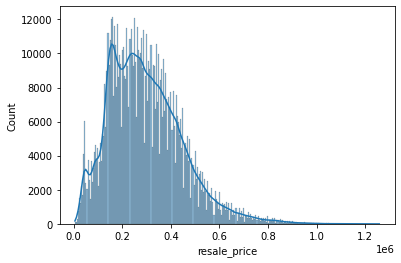

In [20]:
sns.histplot(data = df, x='resale_price', kde=True);

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

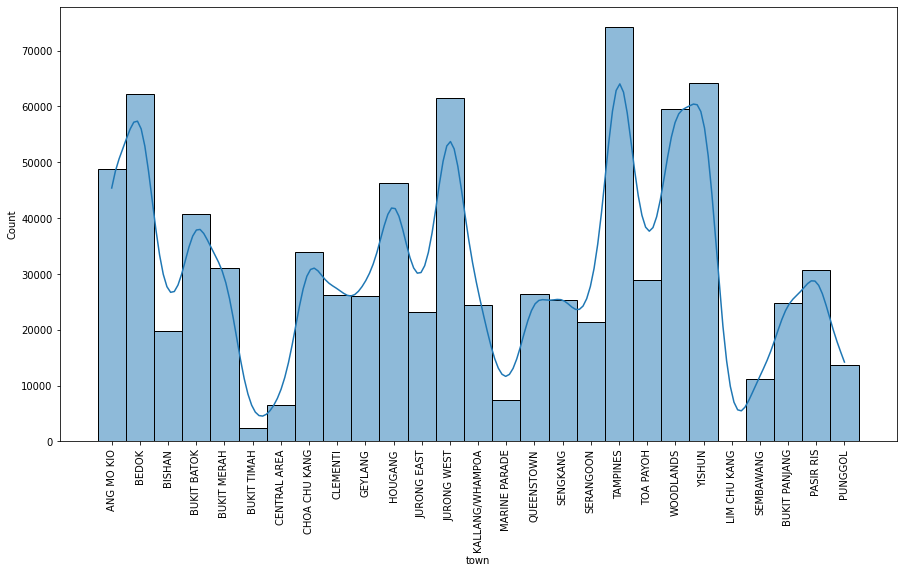

In [21]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x='town', kde=True, bins=40);
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

<AxesSubplot:xlabel='year', ylabel='count'>

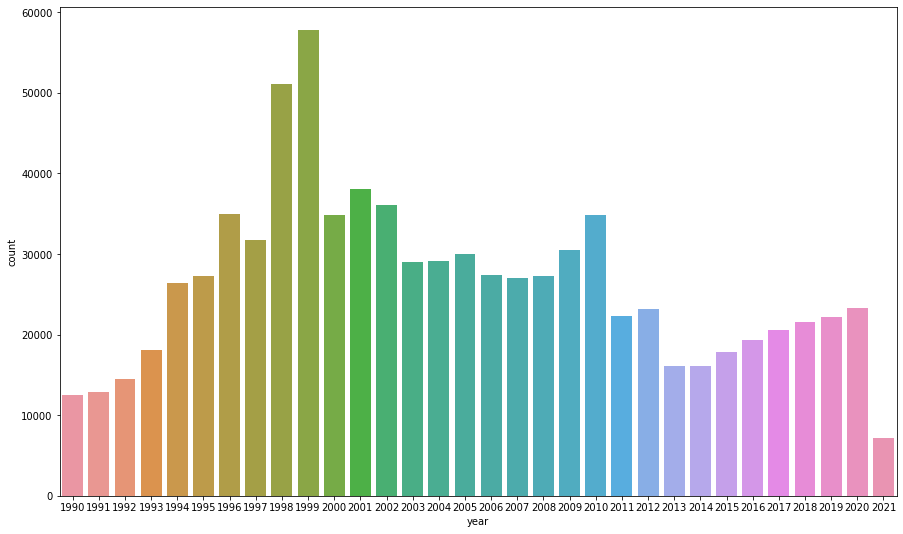

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(data=df, x='year')


In [23]:
# plt.figure(figsize=(15,9))
# sns.pairplot(data=df, y_vars='resale_price', x_vars=['flat_type', 'year', 'town'])
# sns.pairplot(df, )

<AxesSubplot:xlabel='resale_price', ylabel='count'>

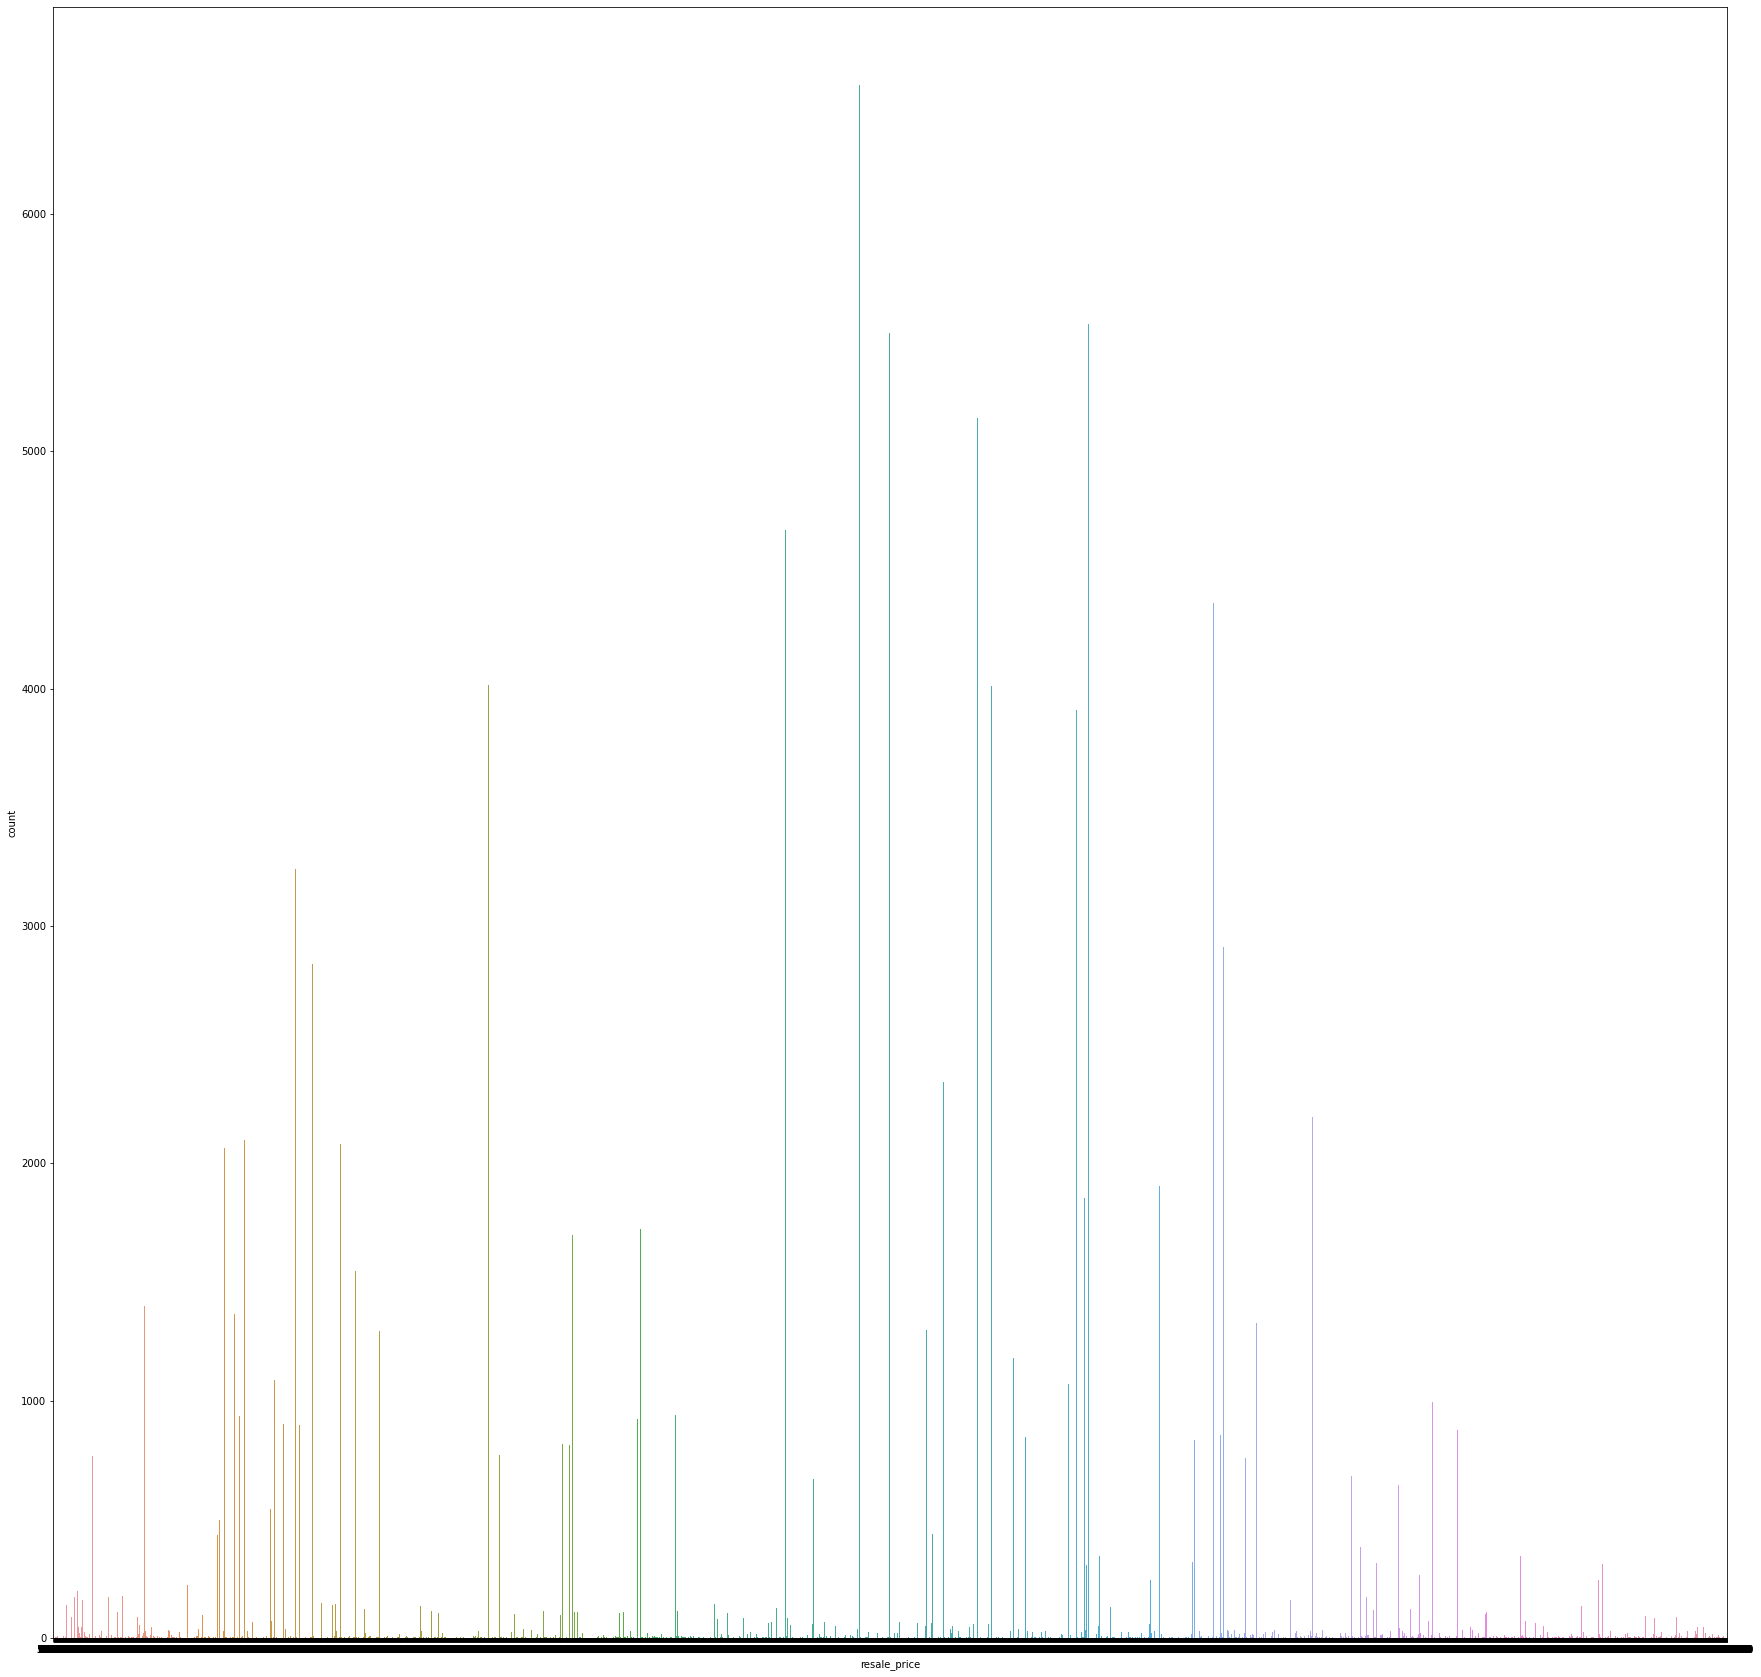

In [24]:
plt.figure(figsize=(30,30))
sns.countplot(data=df, x='resale_price')

<AxesSubplot:xlabel='resale_price', ylabel='flat_type'>

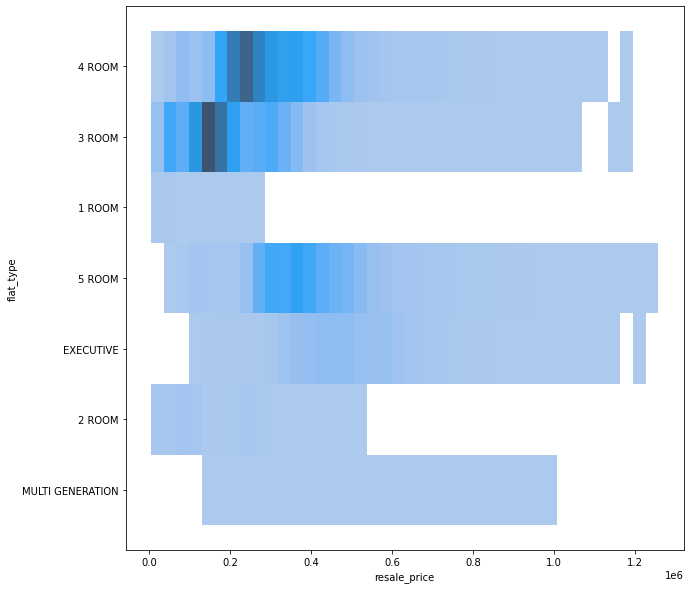

In [25]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='resale_price', y='flat_type', bins=40)

# Preprocessing

### removing some columns

In [26]:
df = df.drop(columns=['block', 'town_dummy', 'storey_range'])

In [27]:
df = df.drop(columns=['month','street_name', 'address', 'price_psm_yearly', 'Core CPI', 'year_gni', 'flat_model','price cpi_adj', 'price_psm cpi_adj', 'bala lease pct', 'price_psm cpi_lease_adj implied' ])

# Splitting data

In [28]:
X = df.drop(columns=['resale_price'])
y = df['resale_price']

In [29]:
df

year        town flat_type  latitude   longitude  storey  area_sqm  \
0       1990  ANG MO KIO    4 ROOM  1.365485  103.844025      11      92.0   
1       1990  ANG MO KIO    3 ROOM  1.365485  103.844025       8      82.0   
2       1990  ANG MO KIO    3 ROOM  1.366272  103.841465       5      73.0   
3       1990  ANG MO KIO    3 ROOM  1.365485  103.844025      11      67.0   
4       1990  ANG MO KIO    4 ROOM  1.369226  103.841652       5      81.0   
...      ...         ...       ...       ...         ...     ...       ...   
840913  2021      YISHUN    3 ROOM  1.433340  103.829168       8      64.0   
840914  2021      YISHUN    3 ROOM  1.430248  103.828862       2      68.0   
840915  2021      YISHUN    2 ROOM  1.423215  103.848264       8      47.0   
840916  2021      YISHUN    2 ROOM  1.421059  103.846357       8      48.0   
840917  2021      YISHUN    2 ROOM  1.421059  103.846357       2      48.0   

        lease_start  lease_rem  resale_price    price_psm  \
0              1976         85       86000.0   934.782609   
1              1976         85       59000.0   719.512195   
2              1976         85       47200.0   646.575343   
3              1976         85       47200.0   704.477612   
4              1977         86       80000.0   987.654321   
...             ...        ...           ...          ...   
840913         1986         64      273000.0  4265.625000   
840914         1984         62      268000.0  3941.176471   
840915         2015         93      260000.0  5531.914894   
840916         2013         91      250000.0  5208.333333   
840917         2013         91      210000.0  4375.000000   

        price lease_adj implied  price_psm lease_adj implied  \
0                  88869.752422                   965.975570   
1                  60968.783638                   743.521752   
2                  48775.026911                   668.151054   
3                  48775.026911                   727.985476   
4                  82315.112540                  1016.235957   
...                         ...                          ...   
840913            318058.252427                  4969.660194   
840914            316847.290640                  4659.518980   
840915            262184.873950                  5578.401574   
840916            253164.556962                  5274.261603   
840917            212658.227848                  4430.379747   

        price cpi_lease_adj implied  
0                     144292.502700  
1                      98991.368143  
2                      79193.094510  
3                      79193.094510  
4                     133650.125891  
...                             ...  
840913                316791.088078  
840914                315584.950818  
840915                261140.312672  
840916                252155.933266  
840917                211810.983899  

[840918 rows x 14 columns]

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840918 entries, 0 to 840917
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         840918 non-null  int64  
 1   town                         840918 non-null  object 
 2   flat_type                    840918 non-null  object 
 3   latitude                     840918 non-null  float64
 4   longitude                    840918 non-null  float64
 5   storey                       840918 non-null  int64  
 6   area_sqm                     840918 non-null  float64
 7   lease_start                  840918 non-null  int64  
 8   lease_rem                    840918 non-null  int64  
 9   price_psm                    840918 non-null  float64
 10  price lease_adj implied      840918 non-null  float64
 11  price_psm lease_adj implied  840918 non-null  float64
 12  price cpi_lease_adj implied  840918 non-null  float64
dtyp

### converting categorical columns to numerical

In [31]:
enc = LabelEncoder()

In [32]:
X['town']=enc.fit_transform(X['town'])


In [33]:
X['flat_type']=enc.fit_transform(X['flat_type'])

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840918 entries, 0 to 840917
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         840918 non-null  int64  
 1   town                         840918 non-null  int64  
 2   flat_type                    840918 non-null  int64  
 3   latitude                     840918 non-null  float64
 4   longitude                    840918 non-null  float64
 5   storey                       840918 non-null  int64  
 6   area_sqm                     840918 non-null  float64
 7   lease_start                  840918 non-null  int64  
 8   lease_rem                    840918 non-null  int64  
 9   price_psm                    840918 non-null  float64
 10  price lease_adj implied      840918 non-null  float64
 11  price_psm lease_adj implied  840918 non-null  float64
 12  price cpi_lease_adj implied  840918 non-null  float64
dtyp

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create and fit model

In [38]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = LR.predict(X_test)

In [40]:
MAE = mean_absolute_error(y_test, y_pred)

In [41]:
MAE

2576.8341030815754

In [42]:
LR.score(X_test, y_test)

0.9993029712961202

In [43]:
y.mean()
# about 8% error

296800.2073434748

In [44]:
MSE = mean_squared_error(y_test, y_pred)

In [45]:
MSE

15929864.143819274

In [46]:
np.sqrt(MSE)

3991.2233893656307

In [47]:
rscore = r2_score(y_test, y_pred)
rscore

0.9993029712961202

In [48]:
maxerr = max_error(y_test, y_pred)
maxerr

90544.22870117147

In [49]:
LR.coef_

array([-5.72883769e+02,  3.62118351e+01,  2.56852236e+03, -1.00602410e+04,
       -1.47922427e+03, -1.10062620e+01,  4.23262421e+01,  8.07476070e+02,
       -5.93004838e+02,  7.74644424e+01,  8.23507973e-01, -6.77312803e+01,
        5.74010300e-02])

In [50]:
print('score',LR.score(X_test, y_test)*100)

score 99.93029712961203


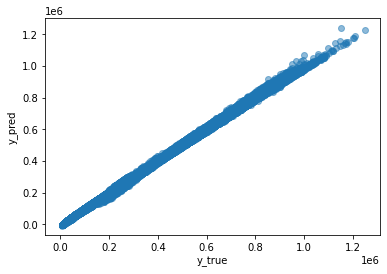

In [51]:
x = np.linspace(0, 15000, 15000)
plt.plot(x, x)
plt.scatter(y_test, y_pred, alpha=0.5);
plt.xlabel('y_true');
plt.ylabel('y_pred');

## Polynomial regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [54]:
poly_converter.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [55]:
poly_features= poly_converter.transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [57]:
poly_model = LinearRegression()

In [58]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = poly_model.predict(X_test)

In [60]:
poly_model.coef_

array([-5.39335106e-04,  1.30574585e-05,  2.19847915e-05, -6.07537024e-06,
       -6.47340927e-06,  5.61990845e-07,  1.97425039e-07, -7.63498289e-08,
       -2.45569158e-07,  2.43612555e-07, -3.42859240e-09,  1.40409130e-07,
        1.41265354e-06, -2.48937304e-05, -8.13466943e-06, -5.52052801e-07,
       -1.46402798e-07, -9.17366488e-07, -2.52043746e-06, -1.21080093e-05,
       -2.14846700e-05,  3.07625457e-06,  6.73805921e-05, -2.25662149e-04,
        1.10378790e-04, -3.54993205e-04, -3.58011296e-07, -1.76992526e-08,
       -1.64763703e-08, -3.94171774e-07, -1.57419550e-08, -5.67674100e-07,
       -7.75801485e-06, -1.34801783e-07, -1.31885482e-06,  1.62984521e-05,
       -4.84112034e-06, -4.07595969e-05, -8.26933124e-09,  5.84855937e-10,
       -3.90371655e-09,  4.32532180e-09, -5.49819706e-08, -4.67518734e-07,
       -3.09252077e-08, -8.75109994e-08, -1.40593187e-05, -3.89193606e-07,
       -1.90214419e-05, -1.04659967e-09, -3.32657765e-09,  1.41097560e-09,
       -3.00787052e-08, -

In [61]:
MAE =mean_absolute_error(y_test, y_pred)
MAE

1.839385841086768

In [62]:
MSE = mean_squared_error(y_test, y_pred)
MSE

8.368764075186967

In [63]:
RMSE = np.sqrt(MSE)
RMSE

2.8928816213573216

In [64]:
r2score = r2_score(y_test, y_pred)
r2score

0.9999999996338156

In [65]:
maxerr = max_error(y_test,y_pred)
maxerr

134.35553427762352

In [66]:
print('score',poly_model.score(X_test, y_test)*100)

score 99.99999996338155


### choosing degree of polynomial

In [67]:
# train_rmse_err = []
# test_rmse_err = []

# for d in range(1, 5): 
#     poly_converter = PolynomialFeatures(degree = d, include_bias=False)
#     poly_featues = poly_converter.fit_transform(X)
    
#     X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
#     poly_model = LinearRegression()
#     poly_model.fit(X_train, y_train)
    
#     train_pred =  poly_model.predict(X_train)
#     test_pred =  poly_model.predict(X_test)
    
#     train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
#     test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
#     train_rmse_err.append(train_rmse)
#     test_rmse_err.append(test_rmse)

In [68]:
# train_rmse_err

In [69]:
# test_rmse_err

## Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge_model = Ridge(alpha=10)

In [72]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [73]:
test_pred = ridge_model.predict(X_test)

In [74]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

1.839385841086768

In [75]:
RMSE =np.sqrt( mean_squared_error(y_test, y_pred))
RMSE

2.8928816213573216

In [76]:
print('score',ridge_model.score(X_test, y_test)*100)

score 99.99999999217718


### using Cross validation for alpha

In [77]:
from sklearn.linear_model import RidgeCV

In [78]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10))

In [79]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [80]:
ridge_cv_model.alpha_

0.1

In [81]:
from sklearn.metrics import SCORERS

In [82]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [83]:
ridge_cv_model2 = RidgeCV(alphas=(0.1,1.0,10), scoring='neg_mean_squared_error')

In [84]:
# this part doesnt work
ridge_cv_model2.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_squared_error')

In [85]:
ridge_cv_model2.alpha_

0.1

In [86]:
y_pred = ridge_cv_model.predict(X_test)

In [87]:
RMSE =np.sqrt( mean_squared_error(y_test, y_pred))
RMSE

2.6535928907097963e+31

In [88]:
ridge_cv_model.coef_

array([ 4.69971436e-04, -1.07794393e-03,  6.98677521e-04, -1.01124729e-06,
        2.51716461e-05, -5.74409370e-04,  1.95134927e-02,  2.00397424e-03,
        1.53114346e-03,  3.29644652e-01,  9.51305300e+01,  3.21701272e-01,
        1.14822109e+02,  1.89444600e+00, -2.16121797e+00,  1.40145299e+00,
       -1.41583164e-03,  9.92385384e-02, -1.14777177e+00,  3.91435418e+01,
        4.95090170e+00,  3.09724327e+00,  6.62510864e+02,  1.90981444e+05,
        6.46848440e+02,  2.30321123e+05, -2.41687075e-02,  6.21845485e-03,
       -1.49571301e-03, -1.11571160e-01, -1.89523874e-02,  1.67334928e-01,
       -2.11238338e+00, -5.78510246e-02, -3.07871038e-01,  7.95991483e+02,
       -9.19886412e-01,  1.00350175e+03,  4.60284536e-03,  9.45077728e-04,
        7.26302203e-02,  3.34886452e-03,  1.36110478e-01,  1.39400055e+00,
        6.17023102e-02,  3.17204211e+00,  5.46463893e+02,  3.28917356e+00,
        6.67394709e+02, -3.09184882e-06, -7.13467451e-05, -7.98288382e-04,
        2.63837024e-02,  

# Lasso

In [89]:
from sklearn.linear_model import LassoCV

In [90]:
lassocv = LassoCV(eps=0.1, n_alphas=10, cv=5)

In [91]:
lassocv.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1, n_alphas=10)

In [92]:
lassocv.alpha_

1.6699769358350693e+21

In [93]:
y_pred = lassocv.predict(X_test)

In [94]:
RMSE =np.sqrt( mean_squared_error(y_test, y_pred))
RMSE

79620.75829220797

In [95]:
lassocv.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

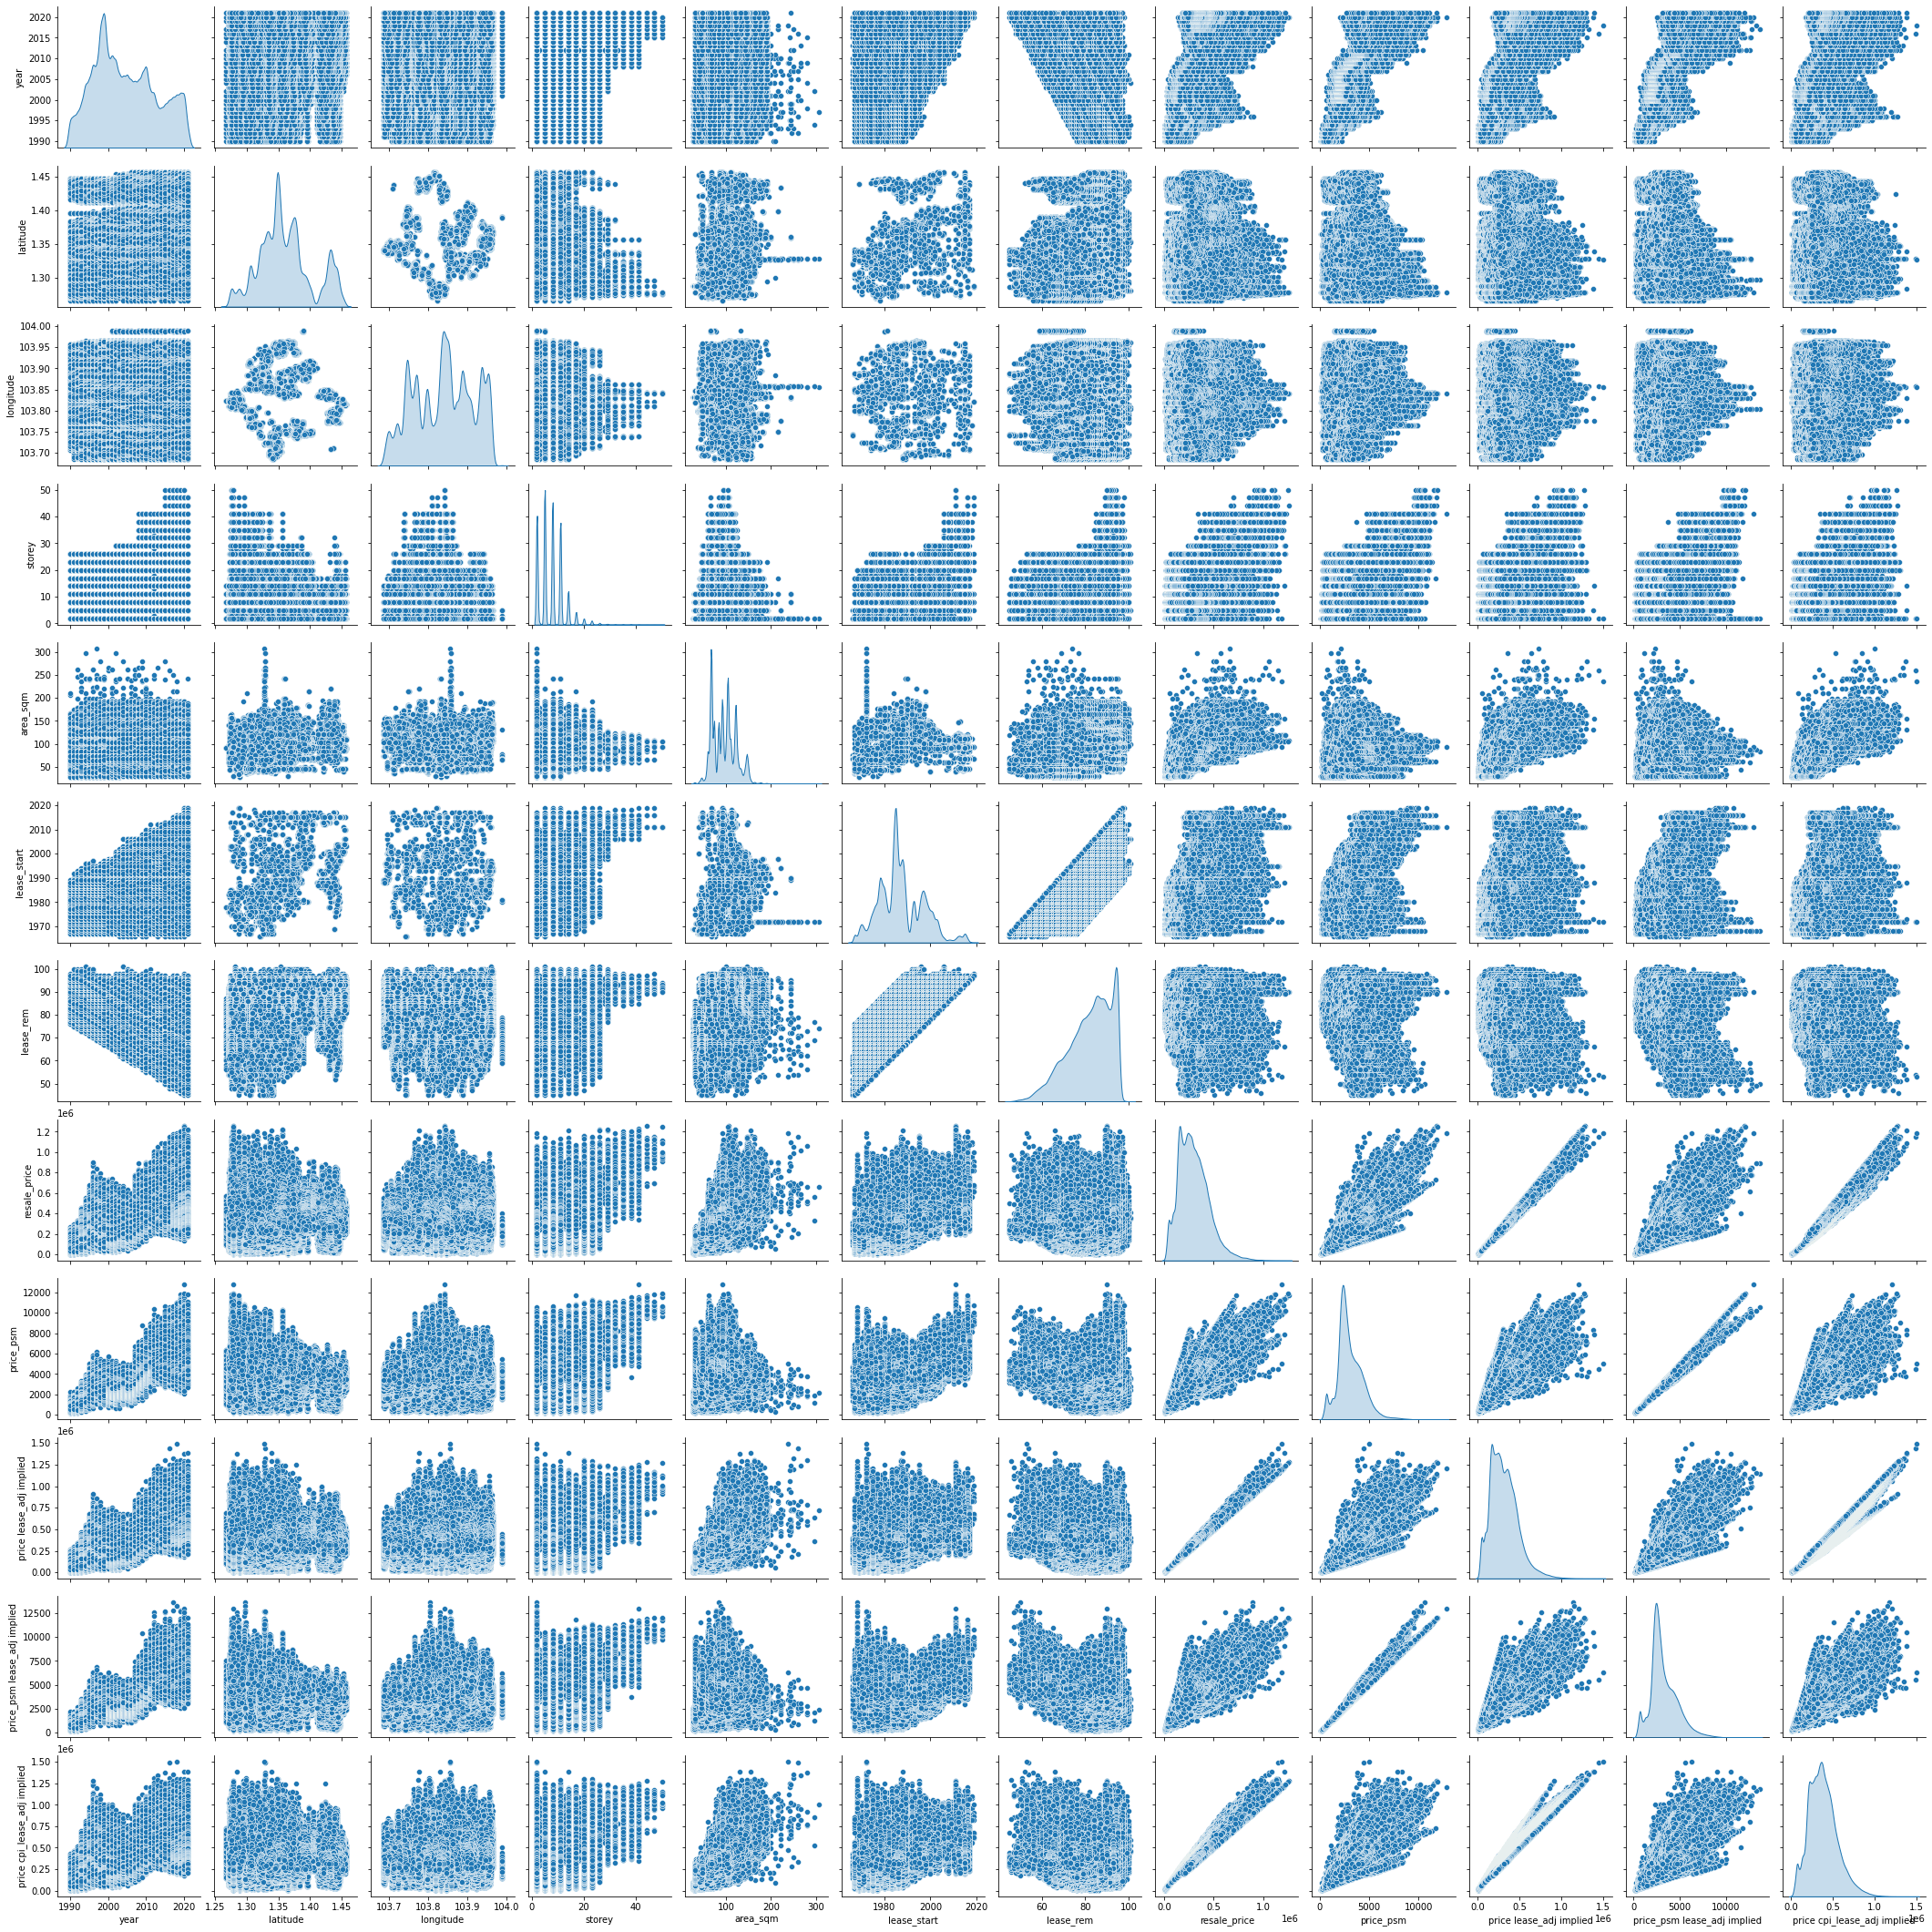

In [96]:
sns.pairplot(data=df, diag_kind='kde');

In [97]:
print('score',lassocv.score(X_test, y_test)*100)

score 72.26097386884939
